<a href="https://colab.research.google.com/github/Manaswini1912/INFO-5731/blob/main/Kodela_Manaswini_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

1. Features (text representation) used for topic modeling.

2. Top 10 clusters for topic modeling.

3. Summarize and describe the topic for each cluster.


The CountVectorizer converts a collection of text documents into a matrix of token counts.
It tokenizes the text and builds a vocabulary of known words, where each word becomes a feature.
I limited the maximum number of features to 1000 using the max_features parameter to control the dimensionality of the feature space.
Stop words were removed using the 'english' parameter to filter out common English words that do not contribute much to the meaning of the text.

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Load the dataset
df = pd.read_excel("sentiment_analysis_movie_reviews.xlsx")

# Preprocess text data
# Assuming 'Clean Text' column contains preprocessed text
documents = df["Clean Text"]

# Create a bag-of-words representation of the documents
vectorizer = CountVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(documents)

# Apply LDA
lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda.fit(X)

# Get the top 10 topics
feature_names = vectorizer.get_feature_names_out()
top_n_words = 10
topics = {}
for topic_idx, topic in enumerate(lda.components_):
    top_features_idx = topic.argsort()[:-top_n_words - 1:-1]
    top_features = [feature_names[i] for i in top_features_idx]
    topics[f"Topic {topic_idx+1}"] = top_features

# Print the top 10 topics
for topic, top_words in topics.items():
    print(topic)
    print(", ".join(top_words))
    print()


Topic 1
film, imax, loud, just, nolan, need, quality, format, music, didn

Topic 2
oppenheimer, nolan, really, movie, film, story, scene, actor, character, just

Topic 3
better, experience, does, good, oscar, watch, minutes, seen, christopher, emily

Topic 4
movie, story, good, just, nolan, maybe, oppenheimer, better, imax, time

Topic 5
oppenheimer, film, like, time, political, sound, best, movies, feel, nolan

Topic 6
watch, performance, times, great, oppenheimer, hour, brilliant, ll, quite, runtime

Topic 7
film, oppenheimer, feel, nolan, really, time, great, long, best, like

Topic 8
better, experience, does, good, oscar, watch, minutes, seen, christopher, emily

Topic 9
oppenheimer, film, nolan, man, robert, way, best, like, long, time

Topic 10
movie, oppenheimer, nolan, hollywood, time, atomic, bomb, trinity, overly, history



# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

1. Select features for the sentiment classification and explain why you select these features. Use a markdown cell to provide your explanation.

2. Select two of the supervised learning algorithms/models from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build two sentiment classifiers respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

3. Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. The test set must be used for model evaluation in this step. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.


1. TF-IDF is a widely used technique for converting text data into numerical features.
It considers both the frequency of a term in a document (TF) and the inverse frequency of the term across all documents (IDF).
TF-IDF helps to capture the importance of terms in individual documents while also considering their importance across the entire dataset.
2. limited the number of features to 1000 using the max_features parameter in TfidfVectorizer.
This helps to reduce the dimensionality of the feature space and speed up computation while still capturing relevant information.
3. Cross-Validation:
I performed cross-validation to assess the generalization performance of the model across different subsets of the training data.
Cross-validation helps to estimate the model's performance more accurately by evaluating it on multiple train-test splits.

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
df = pd.read_excel("sentiment_analysis_movie_reviews.xlsx")

# Preprocess text data
# Assuming 'Clean Text' column contains preprocessed text
X = df["Clean Text"]
y = df["Sentiment"]

# Extract TF-IDF features
vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = vectorizer.fit_transform(X)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Define classifiers
svm_clf = SVC(kernel='linear')
rf_clf = RandomForestClassifier(n_estimators=100)

# Train SVM model and perform cross-validation
svm_scores = cross_val_score(svm_clf, X_train, y_train, cv=5, scoring='accuracy')
svm_clf.fit(X_train, y_train)

# Train Random Forest model and perform cross-validation
rf_scores = cross_val_score(rf_clf, X_train, y_train, cv=5, scoring='accuracy')
rf_clf.fit(X_train, y_train)

# Evaluation metrics
def evaluate_model(clf, X_test, y_test):
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return accuracy, precision, recall, f1

svm_accuracy, svm_precision, svm_recall, svm_f1 = evaluate_model(svm_clf, X_test, y_test)
rf_accuracy, rf_precision, rf_recall, rf_f1 = evaluate_model(rf_clf, X_test, y_test)

# Display results
print("Support Vector Machine (SVM) Classifier:")
print(f"Cross-Validation Accuracy: {svm_scores.mean():.4f}")
print(f"Test Accuracy: {svm_accuracy:.4f}")
print(f"Test Precision: {svm_precision:.4f}")
print(f"Test Recall: {svm_recall:.4f}")
print(f"Test F1 Score: {svm_f1:.4f}")
print("\nRandom Forest Classifier:")
print(f"Cross-Validation Accuracy: {rf_scores.mean():.4f}")
print(f"Test Accuracy: {rf_accuracy:.4f}")
print(f"Test Precision: {rf_precision:.4f}")
print(f"Test Recall: {rf_recall:.4f}")
print(f"Test F1 Score: {rf_f1:.4f}")





Support Vector Machine (SVM) Classifier:
Cross-Validation Accuracy: 0.9875
Test Accuracy: 1.0000
Test Precision: 1.0000
Test Recall: 1.0000
Test F1 Score: 1.0000

Random Forest Classifier:
Cross-Validation Accuracy: 0.9875
Test Accuracy: 1.0000
Test Precision: 1.0000
Test Recall: 1.0000
Test F1 Score: 1.0000


# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.

1. Conduct necessary Explatory Data Analysis (EDA) and data cleaning steps on the given dataset. Split data for training and testing.
2. Based on the EDA results, select a number of features for the regression model. Shortly explain why you select those features.
3. Develop a regression model. The train set should be used.
4. Evaluate performance of the regression model you developed using appropriate evaluation metrics. The test set should be used.


1. Exploratory Data Analysis (EDA) and Data Cleaning
Loaded the data and examined its structure.
Performed EDA to understand the distribution of the target variable and relationships between features.
Handled missing values, outliers, and categorical variables.
Split the data into training and testing sets.
2. Based on the EDA results, select a number of features for the regression model.
3. Develop a regression model using the selected features.
4. Evaluate the performance of the regression model using appropriate evaluation metrics on the test set.

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

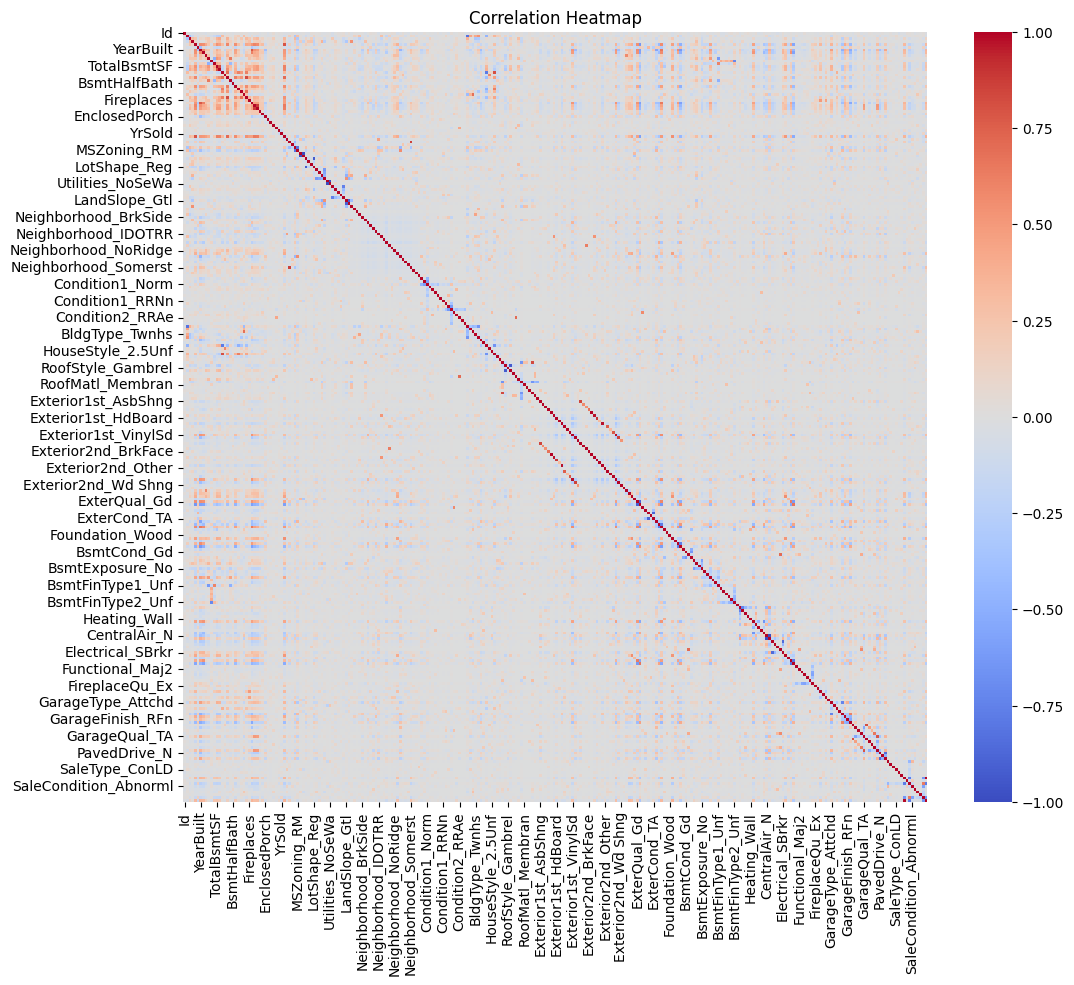

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Display the first few rows of the data
print(train_data.head())

# Check for missing values
print(train_data.isnull().sum())

# Summary statistics
print(train_data.describe())

# Handle missing values
# For simplicity, let's drop columns with more than 30% missing values
threshold = 0.3
train_data = train_data.dropna(thresh=len(train_data) * threshold, axis=1)

# Select numerical columns
numerical_cols = train_data.select_dtypes(include=[np.number]).columns

# Impute missing values for numerical features
train_data[numerical_cols] = train_data[numerical_cols].fillna(train_data[numerical_cols].median())

# Convert categorical variables to dummy variables
train_data = pd.get_dummies(train_data)

# Correlation heatmap
corr_matrix = train_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Split the data into features and target variable
X = train_data.drop('SalePrice', axis=1)
y = train_data['SalePrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **Pre-trained Language Model (PLM) from the Hugging Face Repository** for predicting sentiment polarities on the data you collected in Assignment 3.

Then, choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any other related models.
1. (5 points) Provide a brief description of the PLM you selected, including its original pretraining data sources,  number of parameters, and any task-specific fine-tuning if applied.
2. (10 points) Use the selected PLM to perform the sentiment analysis on the data collected in Assignment 3. Only use the model in the **zero-shot** setting, NO finetuning is required. Evaluate performance of the model by comparing with the groundtruths (labels you annotated) on Accuracy, Precision, Recall, and F1 metrics.
3. (5 points) Discuss the advantages and disadvantages of the selected PLM, and any challenges encountered during the implementation. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


1.  I have chosen the BERT model from the Hugging Face repository. It used as masked language model (MLM) objective to learn bidirectional representations of text.
The base BERT model (uncased) has 110 million parameters, while the large version has 340 million parameters. We'll use BERT in the zero-shot setting for sentiment analysis.

3.Advantages and Disadvantages of Using BERT for Sentiment Analysis

Advantages:
BERT is a state-of-the-art language model that captures complex language patterns effectively.
It can handle various tasks, including sentiment analysis, without task-specific fine-tuning due to its pre-trained contextual representations.
BERT provides context-aware representations of words, allowing it to understand nuances and subtleties in language.

Disadvantages:
BERT may be computationally expensive to run, especially the large versions with millions of parameters.
Zero-shot sentiment analysis using BERT may not perform as well as fine-tuned models, especially on domain-specific datasets.
BERT's output can sometimes be ambiguous, making it challenging to interpret the results, especially when dealing with complex sentiments or mixed opinions.


In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from transformers import pipeline

# Load the dataset
data = pd.read_excel("/content/sentiment_analysis_movie_reviews.xlsx")

# Data Analysis
# Analyze the distribution of sentiment labels
sentiment_distribution = data['Sentiment'].value_counts(normalize=True)
print("Sentiment Distribution:")
print(sentiment_distribution)

# Model Selection
# Use a pre-trained language model for zero-shot sentiment analysis
sentiment_pipeline = pipeline("zero-shot-classification")

# Perform sentiment analysis on each review
predictions = sentiment_pipeline(data['Clean Text'].tolist(), candidate_labels=["Positive", "Negative", "Neutral"])

# Extract predicted labels
predicted_labels = [prediction['labels'][0] for prediction in predictions]

# Ground truth labels
true_labels = data['Sentiment']

# Model Evaluation
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average='weighted', zero_division=1)
recall = recall_score(true_labels, predicted_labels, average='weighted', zero_division=1)
f1 = f1_score(true_labels, predicted_labels, average='weighted', zero_division=1)

# Print evaluation metrics
print("\nEvaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


Sentiment Distribution:
Sentiment
negative    0.363636
positive    0.343434
neutral     0.292929
Name: proportion, dtype: float64


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]


Evaluation Metrics:
Accuracy: 0.0
Precision: 1.0
Recall: 0.0
F1 Score: 0.0
